In [431]:
from glob import glob
from astropy.io import fits
from astropy.visualization import hist
from astropy.modeling import fitting
from astropy.modeling.models import custom_model
fitter = fitting.LevMarLSQFitter()

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import scipy.ndimage as ndi
import astropy.stats as astrostats

In [432]:
archivos= glob("8_10000/*.txt")

In [433]:
Tiempos=[]
Intensidad=[]
n=10000
i=0
while(i<n):
    Datos=np.loadtxt(archivos[i])
    Tiempos.append(Datos[:,0])
    Intensidad.append(Datos[:,1])
    i=i+1

In [434]:
from scipy.stats import entropy
from scipy.stats import skew
promedio, sigma, amplitud, entropia, skewness=[],[],[],[],[]
for i in Intensidad:
    promedio.append(np.mean(i))
    sigma.append(np.std(i))
    amplitud.append(max(i)-min(i))
    skewness.append(skew(i))
    
    prob = np.array(i) / sum(i)
    
    entropia.append(entropy(prob, base = len(i)))

In [435]:
promedio_entropia = promedio.copy()

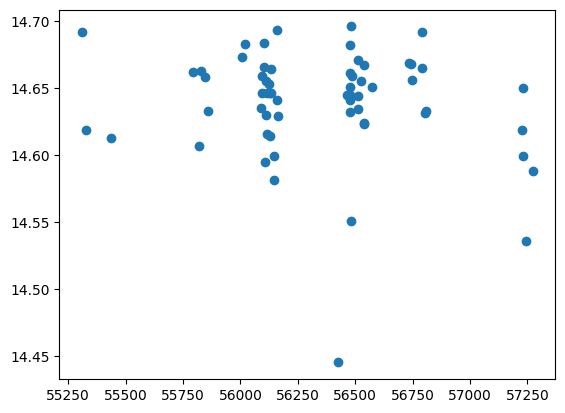

In [436]:
plt.scatter(Tiempos[0], Intensidad[0])

Amplitud y promedio

           3           2
-0.000229 x + 0.04619 x - 1.092 x + 7.087
488


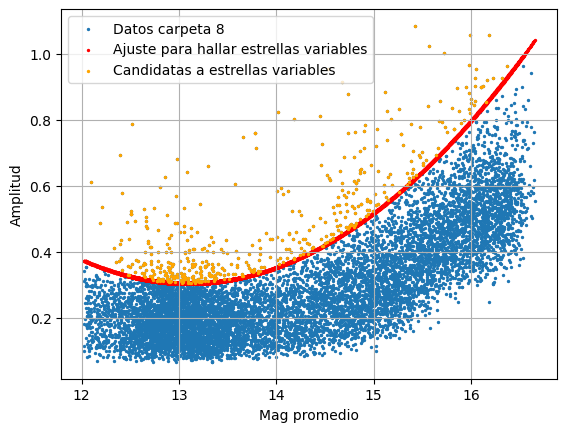

In [437]:
amplitud=np.array(amplitud)

plt.scatter(promedio,amplitud,s=2, label='Datos carpeta 8')
plt.xlabel("Mag promedio")
plt.ylabel("Amplitud")


coefs=np.polyfit(promedio,amplitud,3)
polynomial = np.poly1d(coefs)
print(polynomial)

y_pred = polynomial(promedio) * 1.6
plt.scatter(promedio,y_pred,c="r",s=2, label='Ajuste para hallar estrellas variables')

above_curve_amplitud = amplitud > y_pred

amplitud = np.array(amplitud)
promedio = np.array(promedio)

conteo = np.count_nonzero(above_curve_amplitud)
print(conteo)


plt.scatter(promedio[above_curve_amplitud], amplitud[above_curve_amplitud], color='orange', s=2, label='Candidatas a estrellas variables')
plt.grid()


plt.legend()
plt.savefig('amplitud_cap8.jpeg')
plt.show()

Sigma y promedio

           3            2
0.0003827 x - 0.007501 x + 0.0005363 x + 0.4443
489


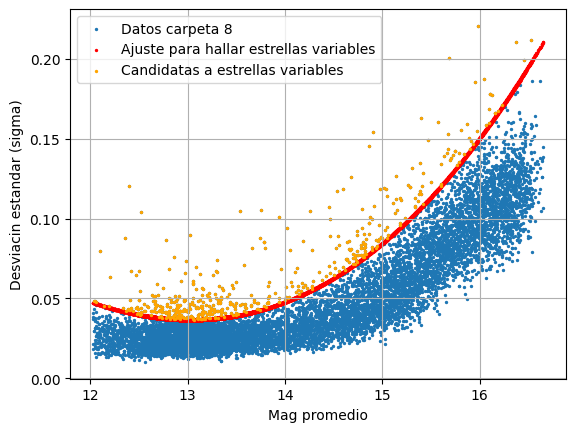

In [438]:
sigma=np.array(sigma)

plt.scatter(promedio,sigma,s=2, label='Datos carpeta 8')
plt.xlabel("Mag promedio")
plt.ylabel("Desviacin estandar (sigma)")


coefs=np.polyfit(promedio,sigma,3)
polynomial = np.poly1d(coefs)
print(polynomial)

y_pred = polynomial(promedio) * 1.5
plt.scatter(promedio,y_pred,c="r",s=2, label='Ajuste para hallar estrellas variables')

above_curve_sigma = sigma > y_pred

sigma = np.array(sigma)
promedio = np.array(promedio)

conteo_sigma = np.count_nonzero(above_curve_sigma)
print(conteo_sigma)

plt.scatter(promedio[above_curve_sigma], sigma[above_curve_sigma], color='orange', s=2, label='Candidatas a estrellas variables')
plt.grid()


plt.legend()
plt.savefig('sigma_cap8.jpeg')
plt.show()

Skew y promedio

482


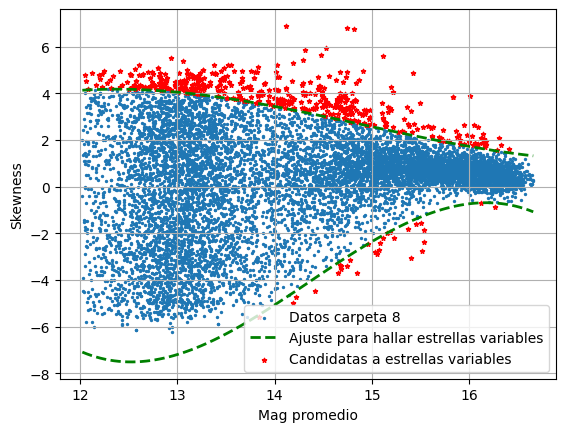

In [439]:
skewness = np.array(skewness)
promedio = np.array(promedio)

plt.scatter(promedio, skewness, s=2, label='Datos carpeta 8')
plt.xlabel("Mag promedio")
plt.ylabel("Skewness")

x_fit = np.linspace(min(promedio), max(promedio), 100)

id_mayor=np.where(skewness>0)

m1=promedio[id_mayor]
s1=skewness[id_mayor]

coefs=np.polyfit(m1,s1,3)
polynomial = np.poly1d(coefs)
y_pred = polynomial(promedio)*1.5+0.7
plt.plot(x_fit, polynomial(x_fit)*1.5+.7, color='green', linestyle='--', linewidth=2)

above_skew1 = skewness > y_pred



id_menor=np.where(skewness<0)
m2=promedio[id_menor]
s2=skewness[id_menor]
coefs=np.polyfit(m2,s2,3)
polynomial = np.poly1d(coefs)*2.6-0.2


y_pred = polynomial(promedio)
plt.plot(x_fit, polynomial(x_fit), color='green', linestyle='--', linewidth=2, label='Ajuste para hallar estrellas variables')


above_skew2 = skewness < y_pred


plt.scatter(promedio[above_skew1], skewness[above_skew1], color='r', s=10, marker='*', label='Candidatas a estrellas variables')
plt.scatter(promedio[above_skew2], skewness[above_skew2], color='r', s=10, marker='*')

num_candidates = np.count_nonzero(skewness[above_skew2])+np.count_nonzero(skewness[above_skew1])
print(num_candidates)

plt.grid()
plt.legend()
plt.savefig('skewness_cap8.jpeg')
plt.show()

Entropia y promedio

In [440]:
a = ['a', 'b', 'c',1,2,3,4,4]
f = a.index(2)
b = a[:f] + a[f+1:]
b

['a', 'b', 'c', 1, 3, 4, 4]

(9999,) (9999,)


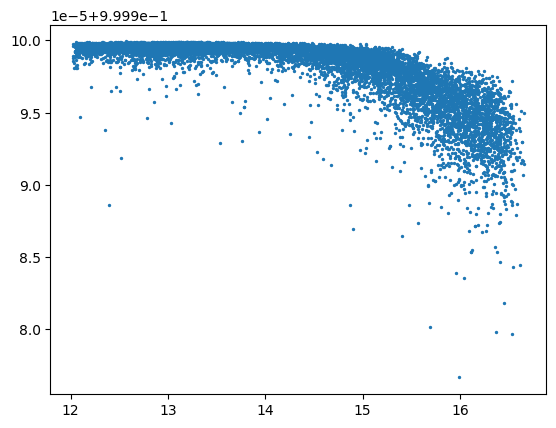

In [441]:
minimo = min(entropia)

pos_minima = entropia.index(minimo)

entropia = entropia[:434] +  entropia[435:]
promedio_entropia = promedio_entropia[:434] +  promedio_entropia[435:]

print(np.shape(entropia), np.shape(promedio_entropia))
plt.scatter(np.array(promedio_entropia), np.array(entropia), s = 2)

plt.show()


            3             2
-1.258e-07 x + 4.724e-06 x - 5.885e-05 x + 1
474


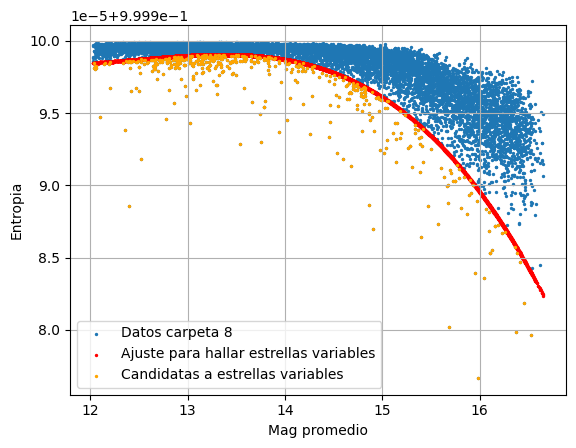

In [442]:

coefs=np.polyfit(promedio_entropia,entropia,3)
polynomial = np.poly1d(coefs)
print(polynomial)

plt.scatter(promedio_entropia, entropia, s=2, label='Datos carpeta 8')
plt.xlabel("Mag promedio")
plt.ylabel("Entropia")

y_pred = polynomial(promedio_entropia) * 2.1 - 1.1
plt.scatter(promedio_entropia,y_pred,c="r",s=2, label='Ajuste para hallar estrellas variables')

above_curve_entropia = entropia < y_pred

entropia = np.array(entropia)
promedio_entropia = np.array(promedio_entropia)

conteo_entropia = np.count_nonzero(above_curve_entropia)
print(conteo_entropia)


plt.scatter(promedio_entropia[above_curve_entropia], entropia[above_curve_entropia], color='orange', s=2, label='Candidatas a estrellas variables')

plt.grid()
plt.legend()
plt.savefig("entropia_cap8.jpeg")
plt.show()